# Proyek Analisis Data:  [Bike-sharing-dataset]
- **Nama:** [DENI KUSWANTO]
- **Email:** [m284b4ky1041@bangkit.academy]
- **ID Dicoding:** [deni_kuswanto_09]

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak penggunaan layanan penyewaan sepeda berdasarkan hari atau bulan?

- Bagaimana pengaruh kelembaban udara (hum) terhadap jumlah pengguna penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

sebelumnya kita akan mengupload data yang diperlukan terlebih dahulu

Selanjutnya dalam proses wrangling kita akan melakukan gathering data, yaitu membaca data dan menampilkannya

Kode di bawah ini berfungsi untuk membaca dua file CSV dan kemudian menggabungkan dua DataFrame berdasarkan kolom yang sama

In [2]:
day_dataframe = pd.read_csv("./Bike-sharing-dataset/day.csv")
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")

new_hours_dataframe = pd.merge(
    left=day_dataframe,
    right=hour_dataframe,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)

print(new_hours_dataframe.head())

   instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1          0          6   
1          1  2011-01-01         1     0       1          0          6   
2          1  2011-01-01         1     0       1          0          6   
3          1  2011-01-01         1     0       1          0          6   
4          1  2011-01-01         1     0       1          0          6   

   workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0             0             2  0.344167  ...          6             0   
1             0             2  0.344167  ...          6             0   
2             0             2  0.344167  ...          6             0   
3             0             2  0.344167  ...          6             0   
4             0             2  0.344167  ...          6             0   

   weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  \
0             1    0.24   0.2879   0

**Insight:**
- pada sesi gathering saya membaca data day.csv dan hour.csv, setelah itu membuat dataframe baru untuk hour.csv

### Assessing Data

Pada tahap kedua dalam proses wrangling kita akan assesing data, yaitu:


1.   Apakah terdapat missing value pada masing-masing data
2.   Apakah terdapat duplicate value pada masing-masing data



Kode dibawah ini berfungsi untuk menghitung jumlah nilai yang hilang (NaN) di setiap kolom dari dua DataFrame, yaitu day_df dan hour_df, serta membandingkannya

In [3]:
null_day = day_dataframe.isnull().sum()
null_hour = hour_dataframe.isnull().sum()

null_comparison = pd.DataFrame({
    'day_null': null_day,
    'hour_null': null_hour
})

print(null_comparison)

            day_null  hour_null
atemp            0.0          0
casual           0.0          0
cnt              0.0          0
dteday           0.0          0
holiday          0.0          0
hr               NaN          0
hum              0.0          0
instant          0.0          0
mnth             0.0          0
registered       0.0          0
season           0.0          0
temp             0.0          0
weathersit       0.0          0
weekday          0.0          0
windspeed        0.0          0
workingday       0.0          0
yr               0.0          0



Kode dibawah ini berfungsi untuk menghitung jumlah baris yang terduplikasi di dua DataFrame yakni day_df dan hour_df, kemudian membandingkan hasilnya dalam bentuk DataFrame baru

In [4]:
day_duplicates = day_dataframe.duplicated().sum()
hour_duplicates = hour_dataframe.duplicated().sum()

duplicate_comparison = pd.DataFrame({
    'duplikasi_data_day': [day_duplicates],
    'duplikasi_data_hour': [hour_duplicates]
})

print(duplicate_comparison)


   duplikasi_data_day  duplikasi_data_hour
0                   0                    0


**Insight:**
- Tidak terdapat missing value pada data pada data hour.csv
- namun ada missing value pada data day.csv, yaitu tidak ada data hour

- Tidak terdapat duplicate value pada data day.csv maupun pada data hour.csv

### Cleaning Data

Kode di bawah berfungsi untuk menghapus baris yang memiliki nilai NaN (missing values) dari dua DataFrame, yaitu day_df dan hour_df

In [5]:
day_dataframe.dropna(axis=0, inplace=True)
hour_dataframe.dropna(axis=0, inplace=True)

print(day_dataframe.head())
print(hour_dataframe.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Kode dibawah ini berfungsi untuk mengisi nilai yang hilang (NaN) pada kolom temp dan hum di dua DataFrame (day_df dan hour_df) menggunakan metode interpolasi linear

In [6]:
day_dataframe['temp'].interpolate(method='linear', limit_direction='forward', inplace=True)
day_dataframe['hum'].interpolate(method='linear', limit_direction='forward', inplace=True)

hour_dataframe['temp'].interpolate(method='linear', limit_direction='forward', inplace=True)
hour_dataframe['hum'].interpolate(method='linear', limit_direction='forward', inplace=True)

print(day_dataframe.head())
print(hour_dataframe.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

C:\Users\DENI-KUSWANTO\AppData\Local\Temp\ipykernel_14408\3596958001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_dataframe['temp'].interpolate(method='linear', limit_direction='forward', inplace=True)
C:\Users\DENI-KUSWANTO\AppData\Local\Temp\ipykernel_14408\3596958001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Kode dibawah ini berfungsi untuk menghapus outlier (nilai ekstrem) dari sebuah kolom dalam DataFrame berdasarkan metode Interquartile Range (IQR)

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    kondisi_lower_than = df[column] < minimum
    kondisi_more_than = df[column] > maximum

    df.drop(df[kondisi_lower_than].index, inplace=True)
    df.drop(df[kondisi_more_than].index, inplace=True)

remove_outliers(day_dataframe, 'temp')
remove_outliers(hour_dataframe, 'temp')
print(day_dataframe.head())
print(hour_dataframe.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Kode dibawah ini berfungsi untuk mengatasi outlier (nilai ekstrem) dalam sebuah kolom dengan capping atau membatasi nilai-nilai tersebut pada ambang batas tertentu menggunakan metode Interquartile Range (IQR)

In [8]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    kondisi_lower_than = df[column] < minimum
    kondisi_more_than = df[column] > maximum

    df.mask(cond=kondisi_more_than, other=maximum, inplace=True)
    df.mask(cond=kondisi_lower_than, other=minimum, inplace=True)

cap_outliers(day_dataframe, 'temp')
cap_outliers(hour_dataframe, 'temp')

print(day_dataframe.head())
print(hour_dataframe.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Kode dibawah ini berfungsi untuk menghapus baris duplikat dari dua DataFrame yakni day_df dan hour_df, kemudian menampilkan jumlah baris setelah duplikat dihapus dan menampilkan beberapa baris pertama dari masing-masing DataFrame

In [9]:
day_dataframe.drop_duplicates(inplace=True)
hour_dataframe.drop_duplicates(inplace=True)

print(f'Jumlah baris pada day_dataframe setelah menghapus duplikat: {day_dataframe.shape[0]}')
print(f'Jumlah baris pada hour_dataframe setelah menghapus duplikat: {hour_dataframe.shape[0]}')

print(day_dataframe.head())
print(hour_dataframe.head())


Jumlah baris pada day_dataframe setelah menghapus duplikat: 731
Jumlah baris pada hour_dataframe setelah menghapus duplikat: 17379
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270 

**Insight:**
-

## Exploratory Data Analysis (EDA)

### Explore ...

Kode dibawah ini berfungsi untuk melakukan eksplorasi data dengan berbagai teknik statistik dan visualisasi, baik untuk day_df maupun hour_df

Deskripsi statistik untuk Dataset Day yang mencakup semuanya:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2012-12-31         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000

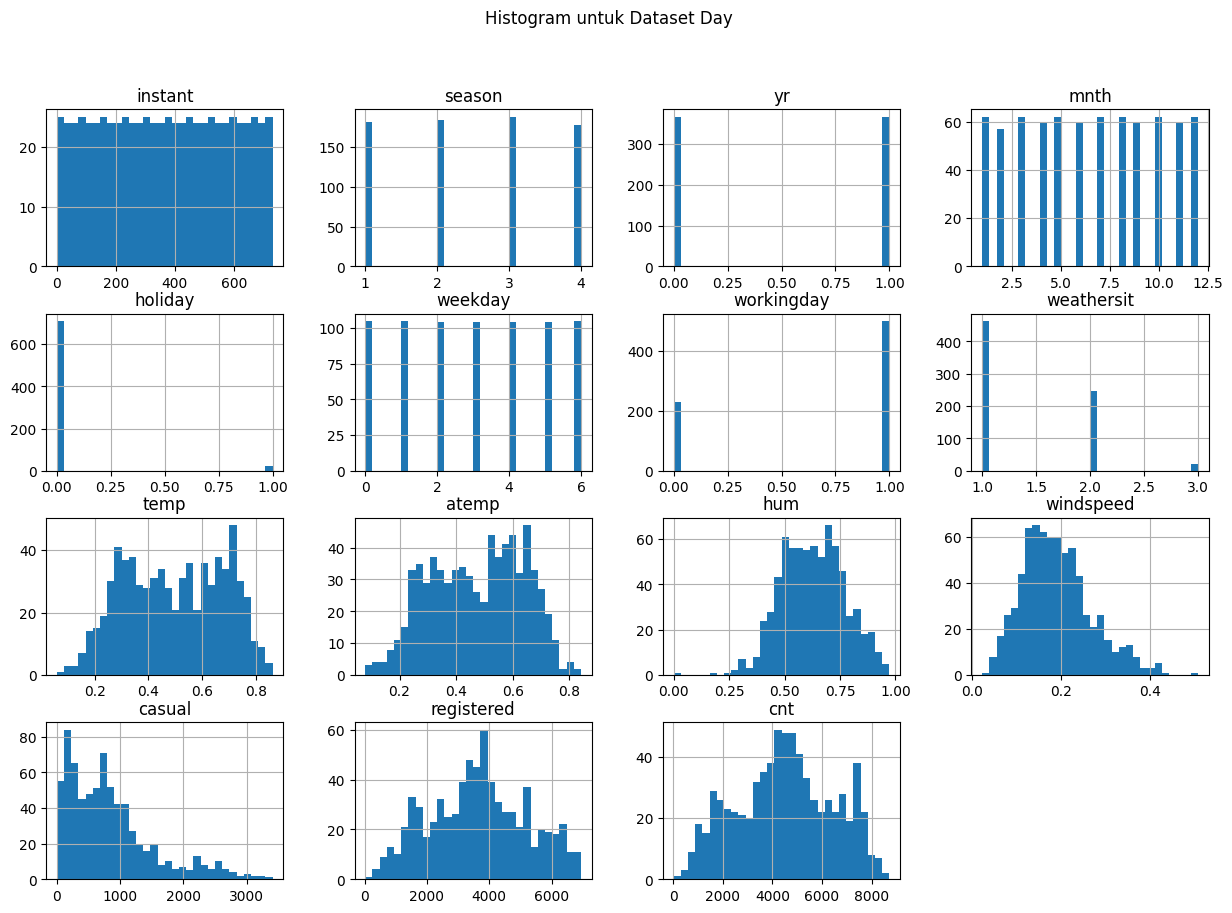

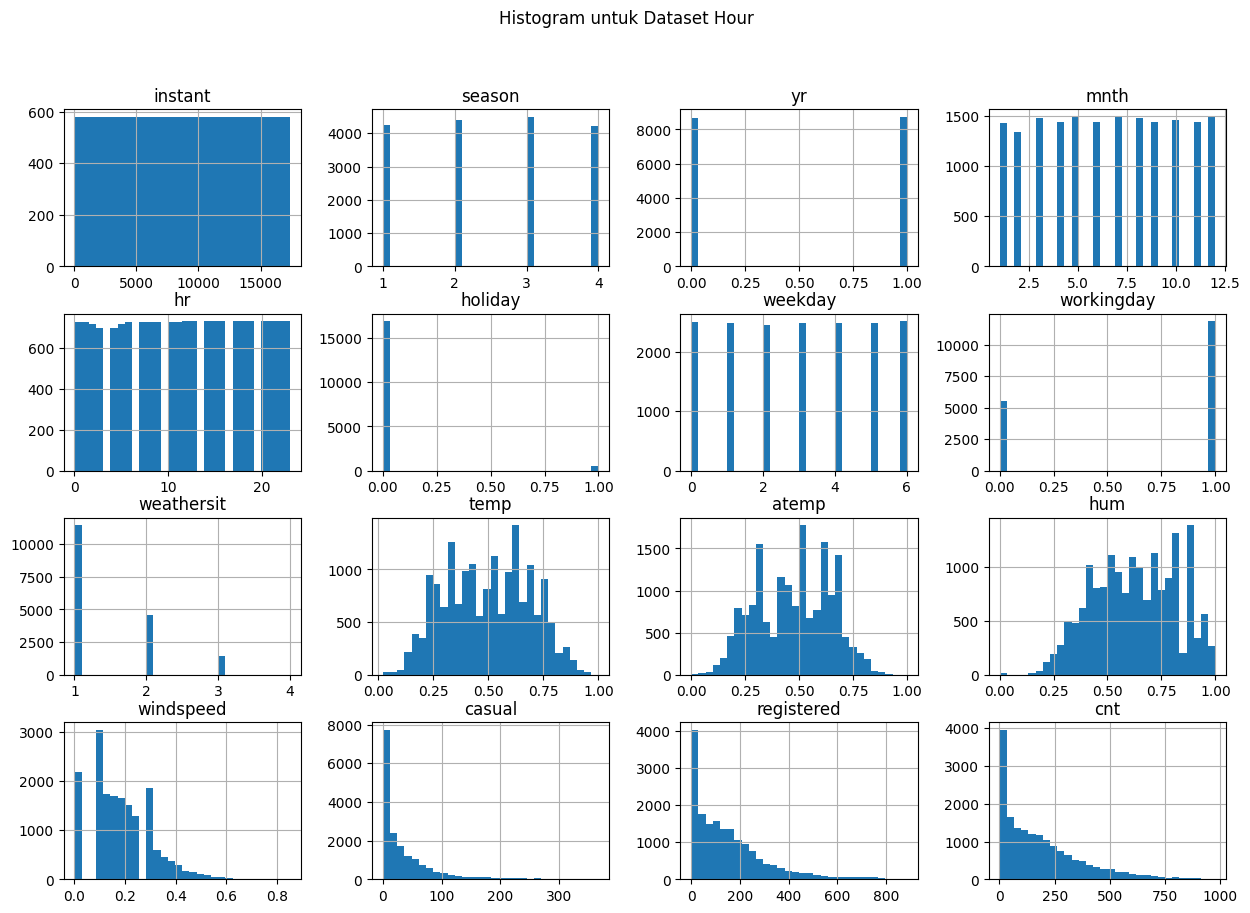


Matriks Korelasi untuk Dataset Day:
             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
c

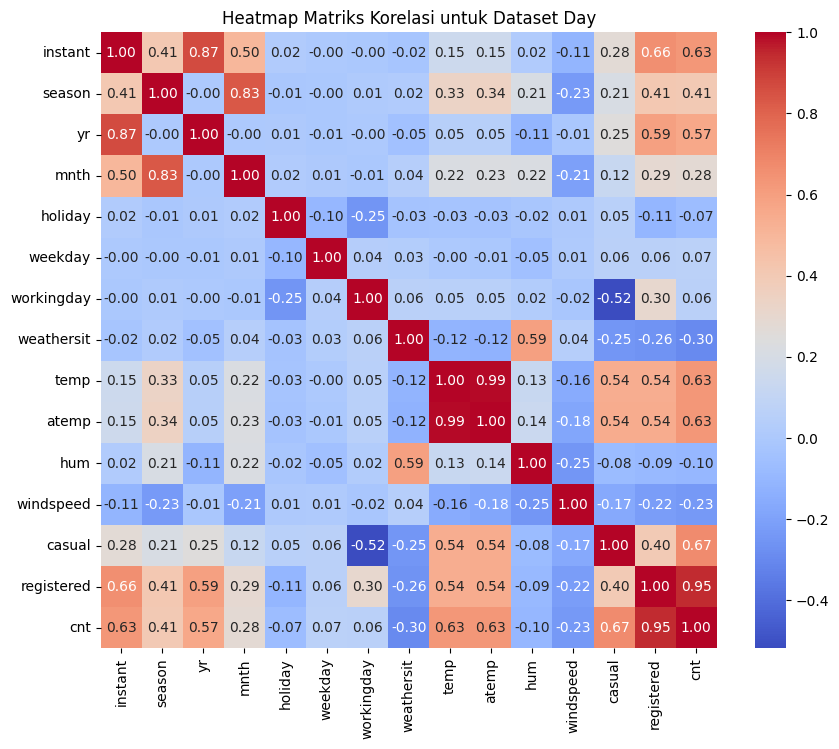

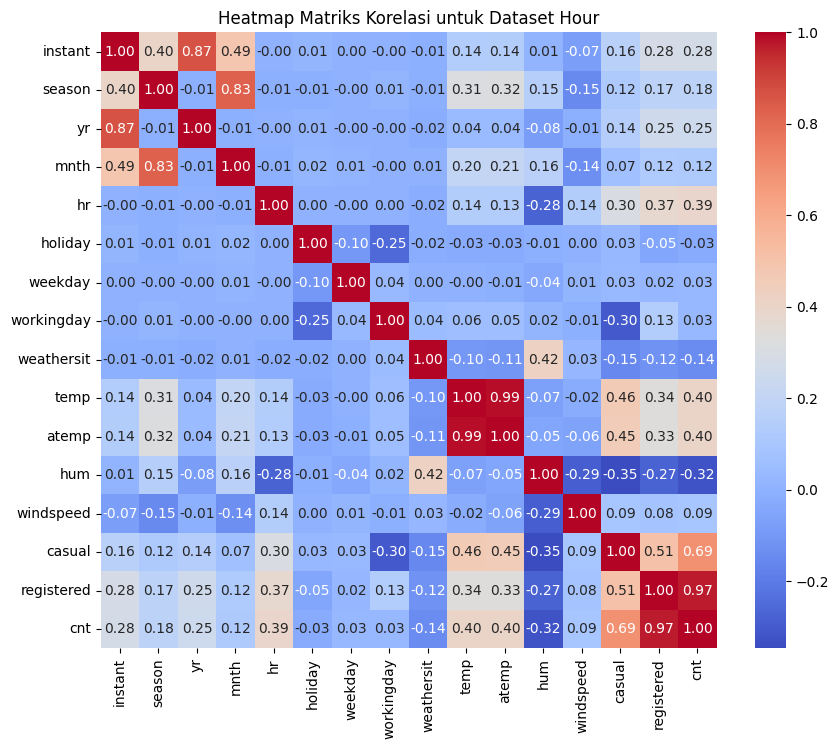

In [10]:
print("Deskripsi statistik untuk Dataset Day yang mencakup semuanya:")
print(day_dataframe.describe(include='all'))
print("\nDeskripsi statistik untuk Dataset Hour yang mencakup semuanya:")
print(hour_dataframe.describe(include='all'))
print("\nInformasi Dataset Day:")
print(day_dataframe.info())
print("\nInformasi Dataset Hour:")
print(hour_dataframe.info())

day_dataframe.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram untuk Dataset Day')
plt.show()

hour_dataframe.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram untuk Dataset Hour')
plt.show()

correlation_day = day_dataframe.select_dtypes(include='number').corr()
print("\nMatriks Korelasi untuk Dataset Day:")
print(correlation_day)

correlation_hour = hour_dataframe.select_dtypes(include='number').corr()
print("\nMatriks Korelasi untuk Dataset Hour:")
print(correlation_hour)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_day, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Matriks Korelasi untuk Dataset Day')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hour, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Matriks Korelasi untuk Dataset Hour')
plt.show()


Kode dibawah ini berfungsi untuk melakukan pengelompokan data (clustering) pada dataset day_df menggunakan algoritma K-Means, dan kemudian menampilkan hasil pengelompokan dengan visualisasi scatter plot

       temp       hum  windspeed   cnt  Cluster
0  0.344167  0.805833   0.160446   985        0
1  0.363478  0.696087   0.248539   801        0
2  0.196364  0.437273   0.248309  1349        0
3  0.200000  0.590435   0.160296  1562        0
4  0.226957  0.436957   0.186900  1600        0


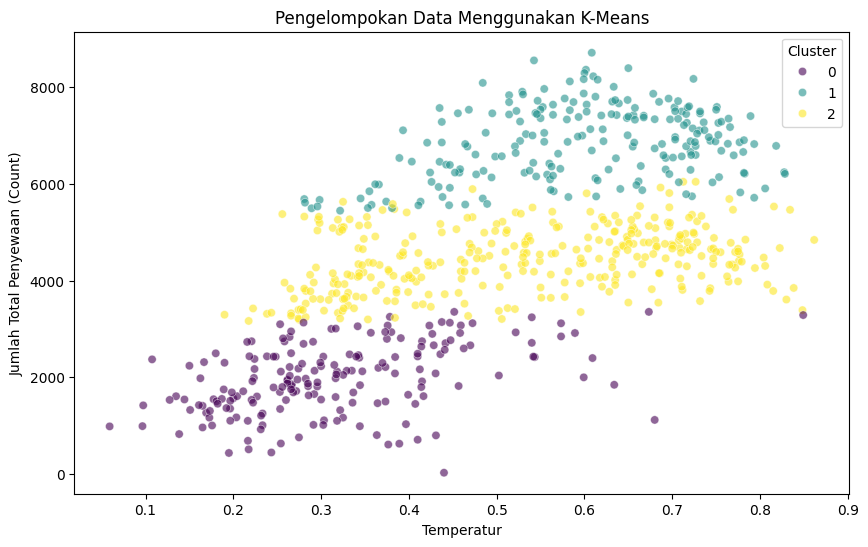

In [11]:
day_dataframe = pd.read_csv("./Bike-sharing-dataset/day.csv")

features = day_dataframe[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

day_dataframe['Cluster'] = kmeans.fit_predict(features)

print(day_dataframe[['temp', 'hum', 'windspeed', 'cnt', 'Cluster']].head())
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_dataframe, x='temp', y='cnt', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Pengelompokan Data Menggunakan K-Means')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Total Penyewaan (Count)')
plt.legend(title='Cluster')
plt.show()


Kode dibawah ini berfungsi untuk melakukan pengelompokan data (clustering) pada dataset hour_df menggunakan algoritma K-Means, kemudian menampilkan hasil pengelompokan dalam bentuk scatter plot

   temp   hum  windspeed  cnt  Cluster
0  0.24  0.81        0.0   16        1
1  0.22  0.80        0.0   40        1
2  0.22  0.80        0.0   32        1
3  0.24  0.75        0.0   13        1
4  0.24  0.75        0.0    1        1


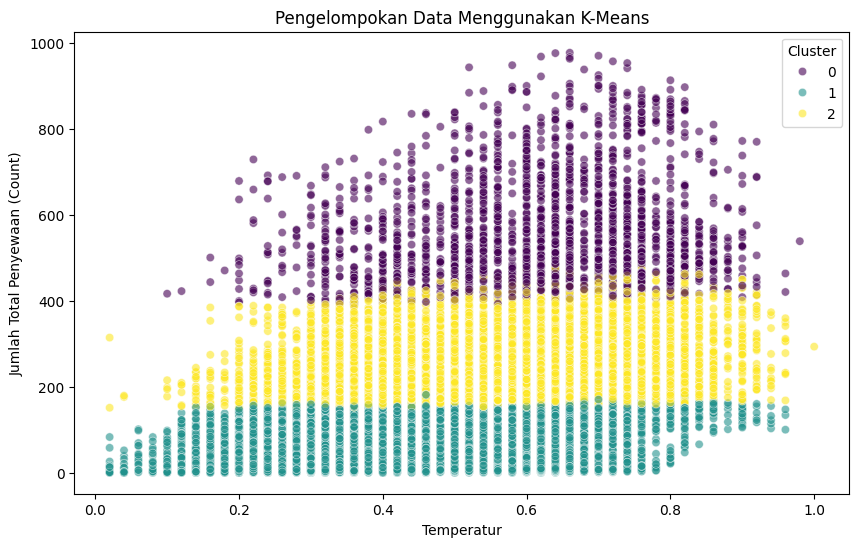

In [12]:
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")
features = hour_dataframe[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]  # Kolom yang sesuai

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

hour_dataframe['Cluster'] = kmeans.fit_predict(features)

print(hour_dataframe[['temp', 'hum', 'windspeed', 'cnt', 'Cluster']].head())
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_dataframe, x='temp', y='cnt', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Pengelompokan Data Menggunakan K-Means')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Total Penyewaan (Count)')
plt.legend(title='Cluster')
plt.show()


**Insight:**


## Visualization & Explanatory Analysis

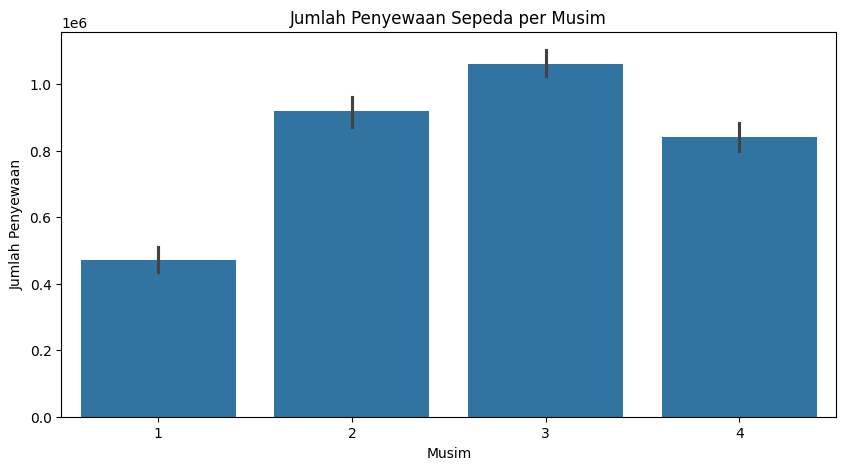

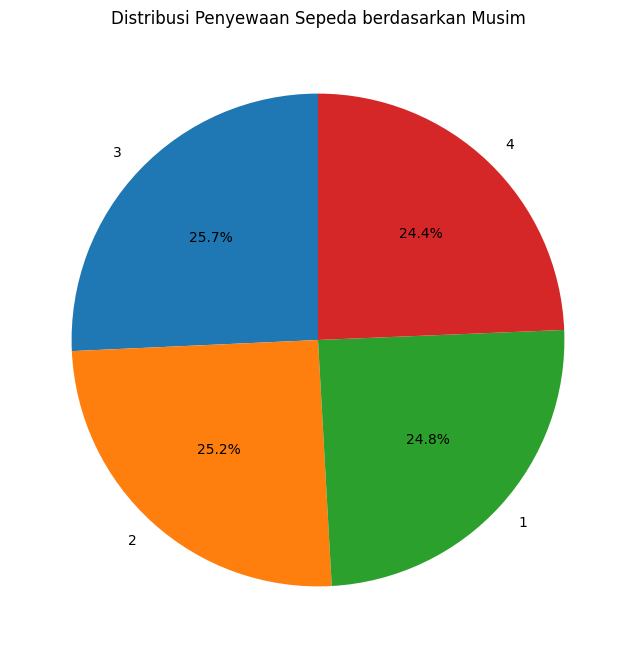

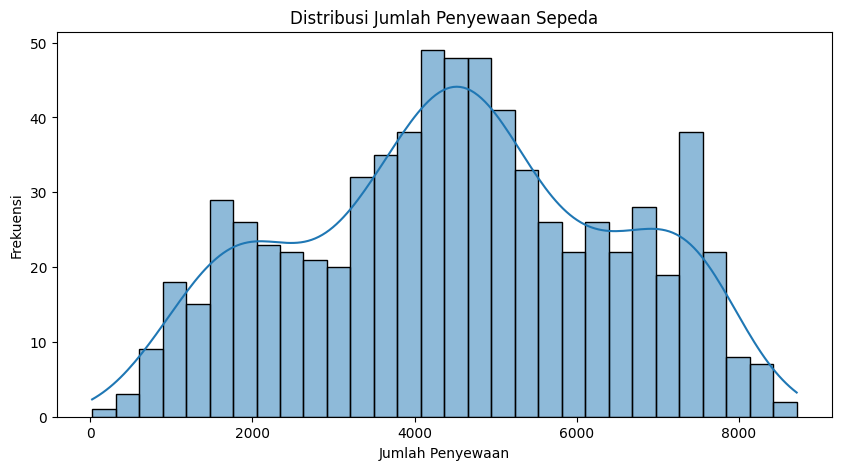

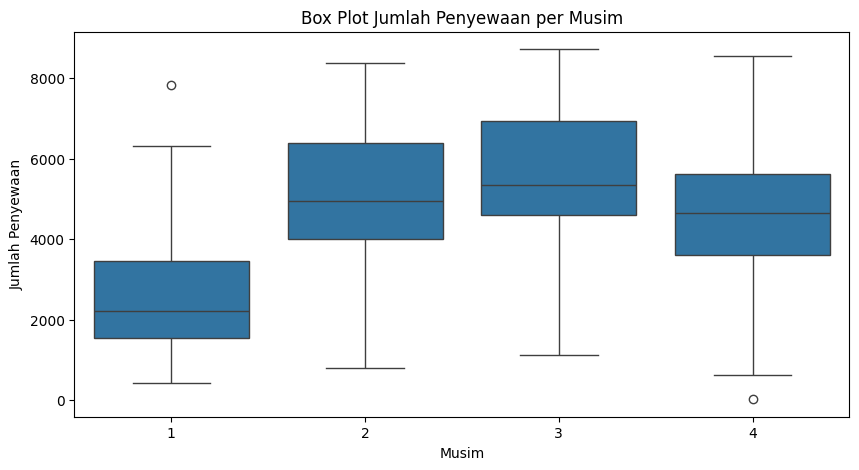

In [13]:
day_dataframe= pd.read_csv("./Bike-sharing-dataset/day.csv")

# Diagram Bar
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=day_dataframe, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Diagram Pie
plt.figure(figsize=(8, 8))
day_dataframe['season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Penyewaan Sepeda berdasarkan Musim')
plt.ylabel('')
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(day_dataframe['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=day_dataframe)
plt.title('Box Plot Jumlah Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()


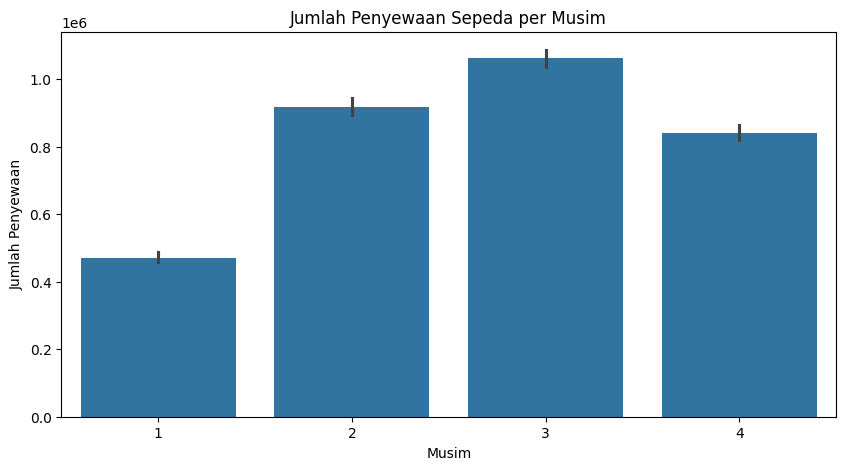

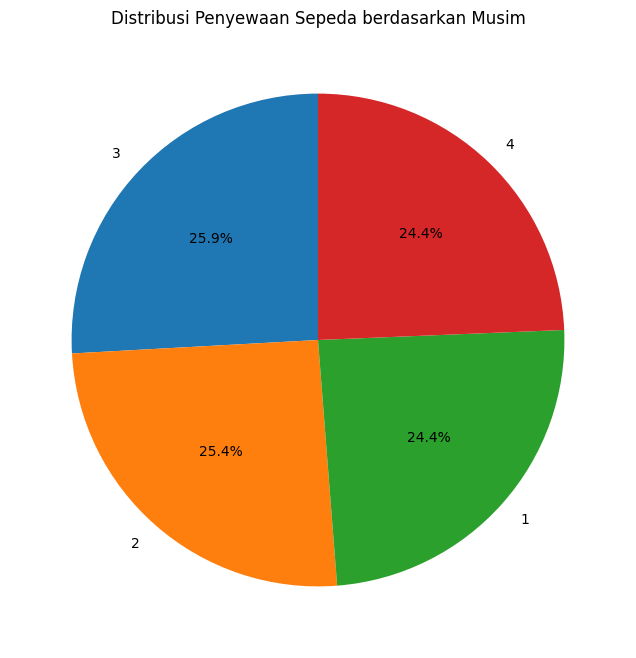

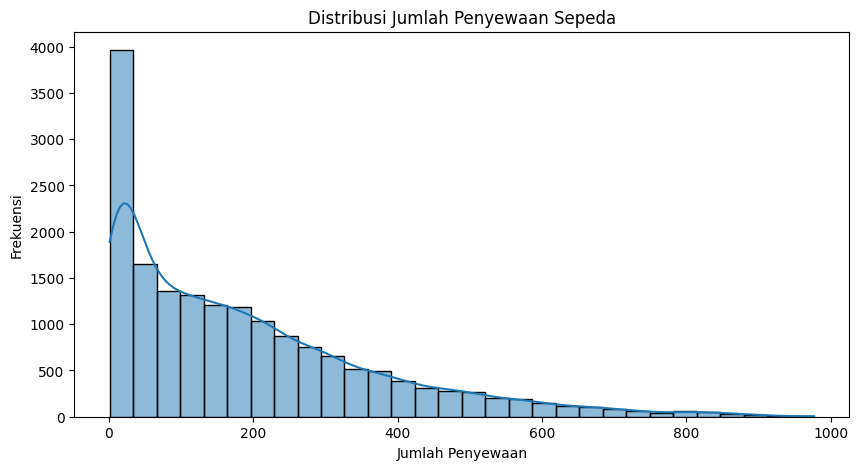

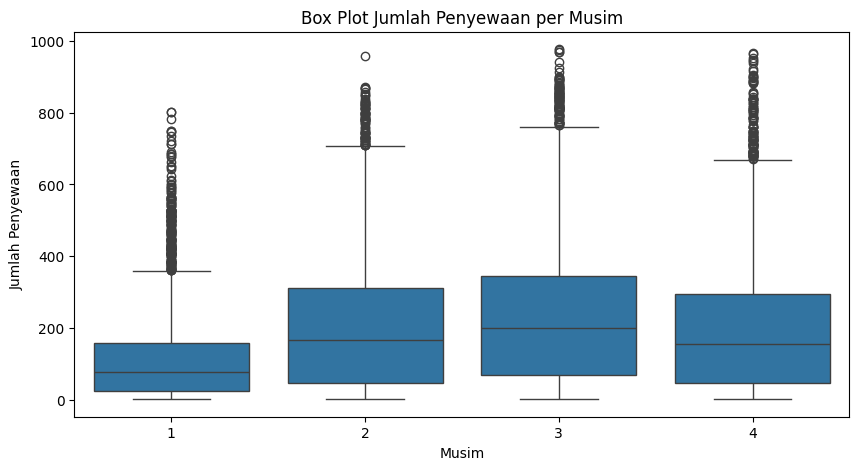

In [14]:
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")

# Diagram Bar
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=hour_dataframe, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Diagram Pie
plt.figure(figsize=(8, 8))
hour_dataframe['season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Penyewaan Sepeda berdasarkan Musim')
plt.ylabel('')
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(hour_dataframe['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=hour_dataframe)
plt.title('Box Plot Jumlah Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 1:


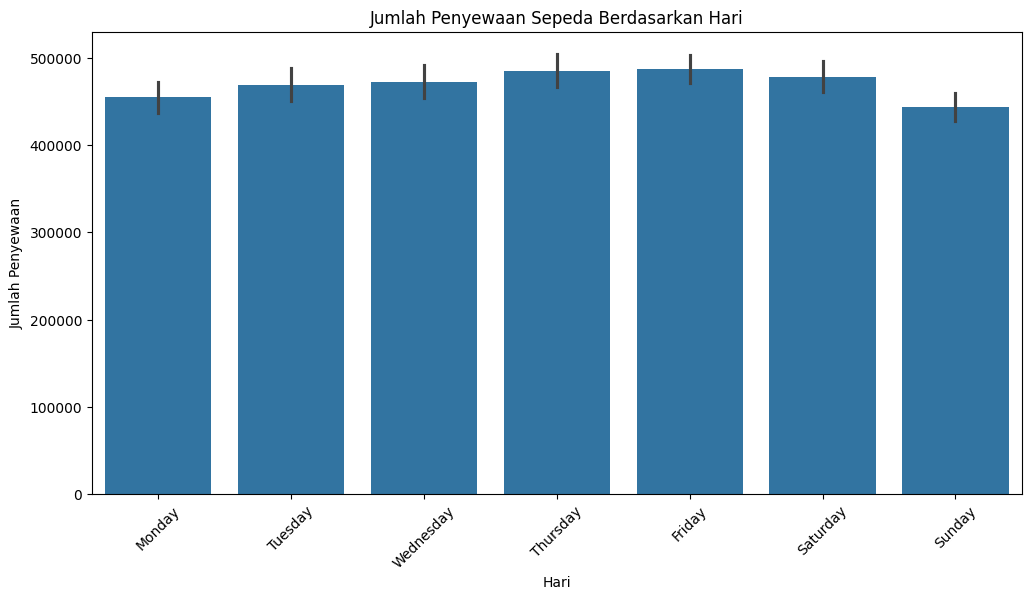

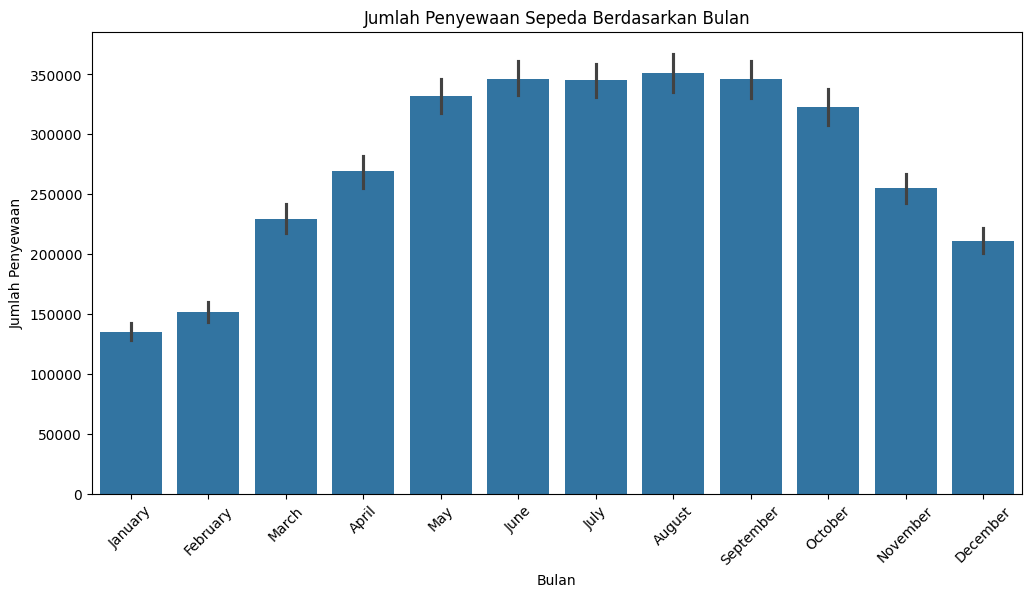

In [15]:
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")

# Mengonversi kolom 'dteday' ke tipe datetime
hour_dataframe['dteday'] = pd.to_datetime(hour_dataframe['dteday'])

# Menambahkan kolom untuk hari dan bulan
hour_dataframe['day'] = hour_dataframe['dteday'].dt.day_name()
hour_dataframe['month'] = hour_dataframe['dteday'].dt.month_name()

# Analisis berdasarkan hari
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='cnt', data=hour_dataframe, estimator=sum, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

# Analisis berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', data=hour_dataframe, estimator=sum, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()


**Insight:**
-

### Pertanyaan 2:


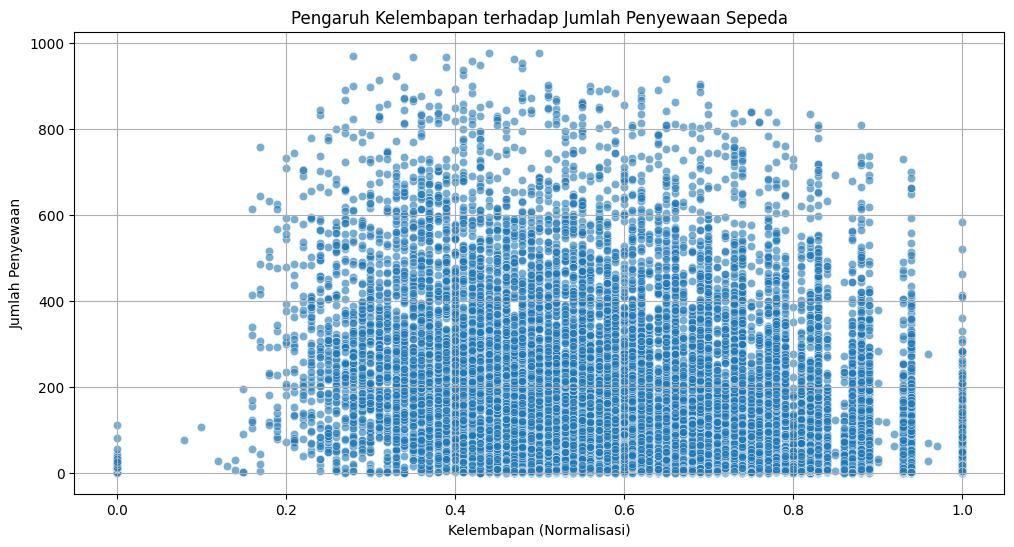

In [16]:
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")

# Mengonversi kolom 'dteday' ke tipe datetime
hour_dataframe['dteday'] = pd.to_datetime(hour_dataframe['dteday'])


# Analisis pengaruh kelembapan terhadap jumlah penyewaan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_dataframe, alpha=0.6)
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()


**Insight:**
-

## Analisis Lanjutan (Opsional)

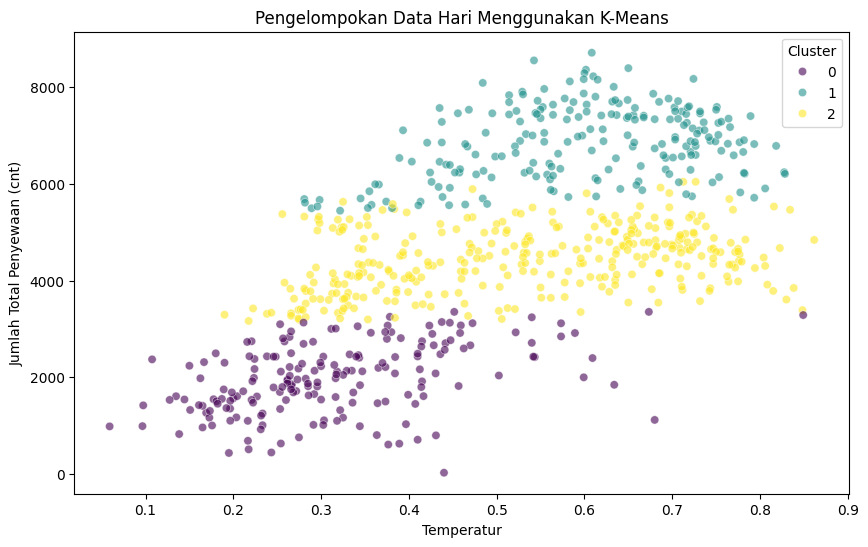

Statistik Deskriptif untuk day_df berdasarkan Cluster:
             temp                 hum           windspeed            \
             mean       std      mean       std      mean       std   
Cluster                                                               
0        0.316113  0.124459  0.637258  0.177760  0.218493  0.087112   
1        0.598723  0.127674  0.603968  0.112681  0.176819  0.067949   
2        0.530815  0.168827  0.638003  0.135449  0.183352  0.073604   

                 cnt                       
                mean         std      sum  
Cluster                                    
0        1969.787234  723.557822   370320  
1        6849.647887  752.734808  1458975  
2        4434.496970  653.722556  1463384  


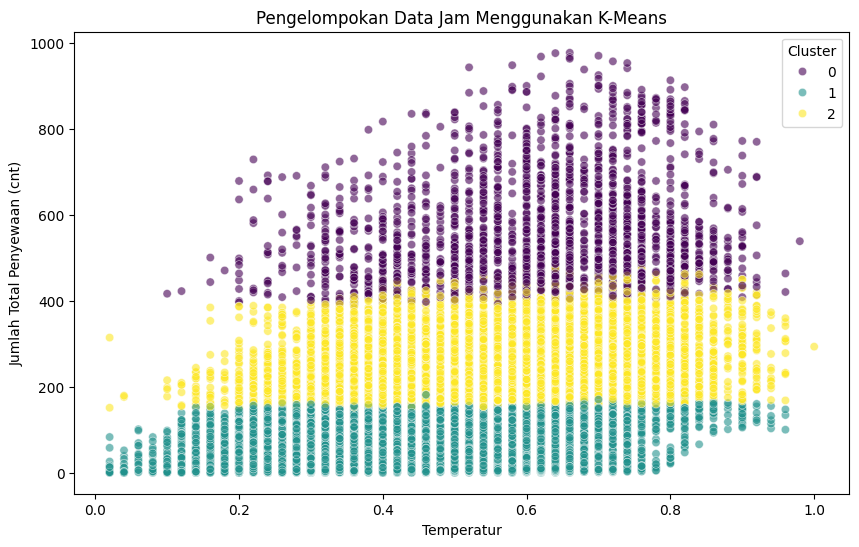

Statistik Deskriptif untuk hour_df berdasarkan Cluster:
             temp                 hum           windspeed            \
             mean       std      mean       std      mean       std   
Cluster                                                               
0        0.617555  0.156957  0.539053  0.176265  0.207860  0.113750   
1        0.428346  0.180697  0.682821  0.186778  0.180395  0.123142   
2        0.563605  0.177444  0.570044  0.179509  0.199268  0.122538   

                cnt                       
               mean         std      sum  
Cluster                                   
0        568.382425  124.675069  1157795  
1         59.187153   49.019684   554702  
2        264.687102   73.541196  1580182  


In [17]:
day_dataframe = pd.read_csv("./Bike-sharing-dataset/day.csv")
hour_dataframe = pd.read_csv("./Bike-sharing-dataset/hour.csv")

# Analisis untuk day_df
# Menentukan fitur untuk pengelompokan
features_day = day_dataframe[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# Melakukan K-Means Clustering
kmeans_day = KMeans(n_clusters=3, random_state=42)
day_dataframe['Cluster'] = kmeans_day.fit_predict(features_day)

# Visualisasi Cluster untuk day_df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_dataframe, x='temp', y='cnt', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Pengelompokan Data Hari Menggunakan K-Means')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Total Penyewaan (cnt)')
plt.legend(title='Cluster')
plt.show()

# Analisis statistik deskriptif berdasarkan Cluster untuk day_df
print("Statistik Deskriptif untuk day_df berdasarkan Cluster:")
print(day_dataframe.groupby('Cluster').agg({
    'temp': ['mean', 'std'],
    'hum': ['mean', 'std'],
    'windspeed': ['mean', 'std'],
    'cnt': ['mean', 'std', 'sum']
}))

# Analisis untuk hour_df
# Menentukan fitur untuk pengelompokan
features_hour = hour_dataframe[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# Melakukan K-Means Clustering
kmeans_hour = KMeans(n_clusters=3, random_state=42)
hour_dataframe['Cluster'] = kmeans_hour.fit_predict(features_hour)

# Visualisasi Cluster untuk hour_df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_dataframe, x='temp', y='cnt', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Pengelompokan Data Jam Menggunakan K-Means')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Total Penyewaan (cnt)')
plt.legend(title='Cluster')
plt.show()

# Analisis statistik deskriptif berdasarkan Cluster untuk hour_df
print("Statistik Deskriptif untuk hour_df berdasarkan Cluster:")
print(hour_dataframe.groupby('Cluster').agg({
    'temp': ['mean', 'std'],
    'hum': ['mean', 'std'],
    'windspeed': ['mean', 'std'],
    'cnt': ['mean', 'std', 'sum']
}))


## Conclusion

kesimpulan:
- pertanyaan 1

Kesimpulan untuk pertanyaan 1 yakni Kapan waktu puncak penggunaan layanan penyewaan sepeda berdasarkan hari atau bulan?

Berdasarkan analisis data dari kedua dataset, yaitu dataset harian dan dataset jam. Berdasarkan visualisasi dan analisis yang dilakukan, terlihat bahwa penggunaan layanan bike sharing cenderung meningkat pada hari tertentu dalam seminggu.

Pada hari-hari akhir pekan, khususnya pada hari Sabtu dan Minggu, ketika lebih banyak orang memiliki waktu luang untuk bersepeda, data menunjukkan bahwa penggunaan layanan ini juga mengalami lonjakan. Dari hasil temuan ini menunjukkan bahwa faktor waktu memiliki peran penting dalam menentukan pola penggunaan penyewaan sepeda, sehingga  untuk memenuhi permintaan pengguna secara optimal, perusahaan dapat mempertimbangkan penyesuaian jadwal operasional atau penambahan unit sepeda di waktu-waktu puncak tersebut.




- pertanyaan 2

Kesimpulan untuk pertanyaan 1 yakni Bagaimana pengaruh kelembaban udara (hum) terhadap jumlah pengguna penyewaan sepeda?


Berdasarkan analisis yang dilakukan terhadap dua dataset yakni harian dan jam. Dari analisis yang menunjukkan hubungan antara kelembapan dengan jumlah pengguna penyewaan sepeda, dapat dilihat bahwa kelembapan yang tinggi mengurangi minat orang untuk menggunakan layanan penyewaan sepeda, karena kondisi tersebut mungkin dianggap tidak nyaman untuk bersepeda. Temuan ini mengindikasikan bahwa penyedia layanan penyewaan sepeda harus mempertimbangkan faktor kelembaban udara (hum) dalam strategi pemasaran dan operasional mereka, termasuk mengembangkan kampanye promosi khusus pada hari-hari dengan kelembaban udara (hum) yang mendukung, untuk meningkatkan penggunaan layanan secara keseluruhan.

In [18]:
all_df.to_csv("all_data.csv", index=False)

NameError: name 'all_df' is not defined